In [3]:
from models import RedshiftSpace
import models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
from CentralStreamingModel.utils import plot_tools as pt
sns.set_context('talk')
import time

In [4]:
n_boxes = range(1,16)
boxsize = 2000
snapshot = 20

rs = []
for i, box in enumerate(n_boxes):
    rs.append(RedshiftSpace(box, boxsize, snapshot))


In [ ]:
importlib.reload(md)

In [5]:
t1 = time.time()
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)
print(f'It took {time.time() - t1} seconds.')

It took 108.67255997657776 seconds.


In [ ]:
s_c

Text(0, 0.5, '$s_\\parallel$ [Mpc/h]')

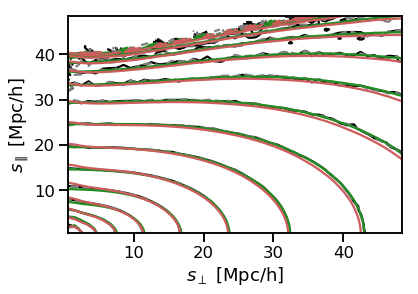

In [6]:
s_c = rs[0].measured.s_c
levels = np.arange(-4, 1, 0.3)


colors = [mean_rs.measured.color] * len(levels)
plt.contour(s_c, s_c, 
            np.log10(mean_rs.measured.pi_sigma.mean).T, 
            levels=levels, colors=colors)

colors = [mean_rs.streaming.color] * len(levels)
plt.contour(mean_rs.streaming.s_c, mean_rs.streaming.s_c,
            np.log10(mean_rs.streaming.pi_sigma).T,
           levels=levels, colors=colors, linestyles='dashed')

colors = [mean_rs.gaussian.color] * len(levels)

plt.contour(mean_rs.gaussian.s_c, mean_rs.gaussian.s_c,
            np.log10(mean_rs.gaussian.pi_sigma).T,
           levels=levels, colors=colors)


colors = [mean_rs.skewt.color] * len(levels)

plt.contour(mean_rs.skewt.s_c, mean_rs.skewt.s_c,
            np.log10(mean_rs.skewt.pi_sigma).T,
           levels=levels, colors=colors)

#plt.xlim(0,30)

#plt.ylim(0,30)

plt.xlabel('$s_\perp$ [Mpc/h]')
plt.ylabel('$s_\parallel$ [Mpc/h]')

In [7]:
n_mu_bins = 120 
mu_bins = np.linspace(0.,1.,n_mu_bins)
mu_c = 0.5*(mu_bins[1:] + mu_bins[:-1])


In [ ]:
import importlib
importlib.reload(pt)

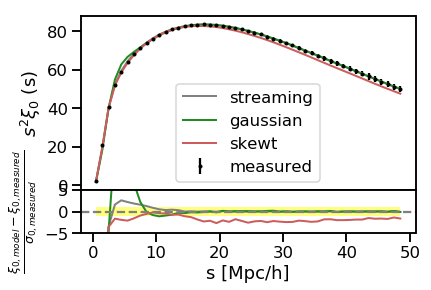

In [8]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                           r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')


In [ ]:
# Monopole integrand
s = 48
integrand = mean_rs.streaming.s_mu[s,:]
mu = np.linspace(0.,1.,120)
mu_c = 0.5 * (mu[1:] + mu[:-1])
plt.plot(mu_c, mean_rs.streaming.s_mu[s,:], color=mean_rs.streaming.color)
plt.plot(mu_c, mean_rs.gaussian.s_mu[s,:], color=mean_rs.gaussian.color)
plt.plot(mu_c, mean_rs.skewt.s_mu[s,:], color=mean_rs.skewt.color)

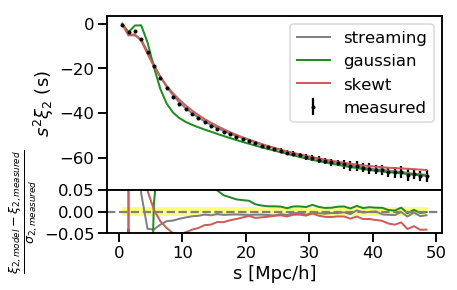

In [9]:
pt.plot_attribute_percent( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
        r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')


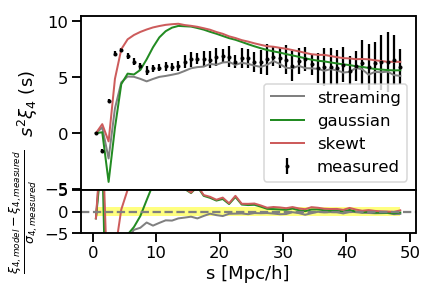

In [10]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'hexadecapole', r'$s^2\xi_4$ (s)',
        r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')


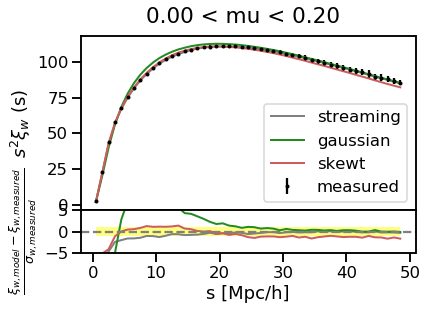

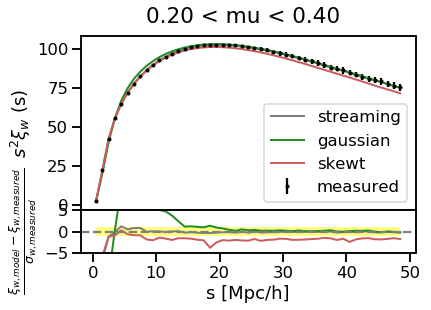

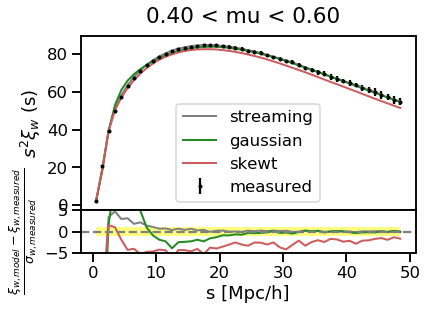

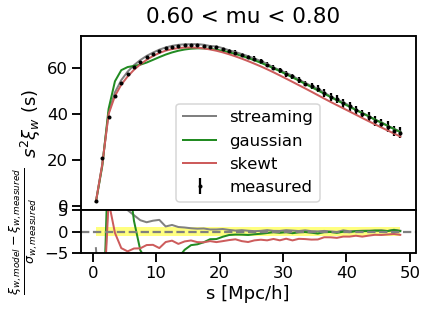

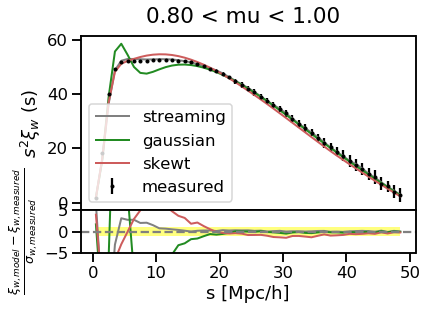

In [11]:
n_wedges = 5

for wedge in range(n_wedges):
    
    pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    f'wedge_{wedge}', r'$s^2\xi_w$ (s)',
        r'$\frac{\xi_{w,model} - \xi_{w, measured}}{\sigma_{w, measured}}$',
        title =f'{mean_rs.skewt.wedges_bins[wedge]:.2f} < mu < {mean_rs.skewt.wedges_bins[wedge+1]:.2f}' )
    plt.show()

## Compare integration methods

In [ ]:
s = 25
mu = 0.5
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')



plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

limits = [0.,5., rparal -2, rparal+3, rparal+10, 70.25]
#limits = [0., 5.,10.,70.]
for limit in limits:
    plt.axvline(x = limit, color='gray', linestyle='--')

plt.xlim(-5,70)


int_r = mean_rs.gaussian.int_r_parallel

plt.ylabel('Streaming Integrand')
plt.xlabel('$r_\parallel$ [Mpc/h]')
plt.show()


plt.semilogy(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')



plt.semilogy(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.semilogy(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

for limit in limits:
    plt.axvline(x = limit, color='gray', linestyle='--')

plt.xlim(-5,70)
plt.ylabel('Streaming Integrand')
plt.xlabel('$r_\parallel$ [Mpc/h]')
plt.show()


In [ ]:
from scipy.integrate import simps

total_stream = -1.
total_gauss = -1.
total_skewt = -1.

areas = ['i)', 'ii)', 'iii)', 'iv)', 'v)', 'vi)', 'vii)']

left = mean_rs.streaming.int_r_parallel < 0.
right = mean_rs.streaming.int_r_parallel > 0.

int_left = simps(mean_rs.streaming.integrand[rperp, rparal, left],
        mean_rs.streaming.int_r_parallel[left])

integrand = mean_rs.streaming.integrand[rperp,rparal, right]
r_parallel = mean_rs.streaming.int_r_parallel[right]

int_left_gauss = simps(mean_rs.gaussian.integrand[rperp, rparal, left],
        mean_rs.streaming.int_r_parallel[left])

integrand_gauss = mean_rs.gaussian.integrand[rperp,rparal, right]

int_left_skewt = simps(mean_rs.skewt.integrand[rperp, rparal, left],
        mean_rs.streaming.int_r_parallel[left])

integrand_skewt = mean_rs.skewt.integrand[rperp,rparal, right]

total_stream += int_left
total_skewt += int_left_skewt
total_gauss += int_left_gauss

print(f'0) Gaussian {(int_left_gauss - int_left):.4f}, '
              f'Skewt {(int_left_skewt - int_left):.4f}')#, Stream : {stream_:.4f} ')  
for i in range(len(limits)-1):
    

    stream_ = simps(np.where((r_parallel > limits[i]) & (r_parallel < limits[i+1]),
                                integrand, 0) ,r_parallel)
    gauss_ = simps(np.where((r_parallel > limits[i]) & (r_parallel < limits[i+1]),
                                integrand_gauss, 0) ,r_parallel)
    
    skewt_ = simps(np.where((r_parallel > limits[i]) & (r_parallel < limits[i+1]),
                                integrand_skewt, 0) ,r_parallel)
    


    total_stream += stream_
    total_gauss += gauss_
    total_skewt += skewt_
    
    print(f'{areas[i]} Gaussian {(gauss_ - stream_):.4f}, '
              f'Skewt {(skewt_ - stream_):.4f}')#, Stream : {stream_:.4f} ')  
    
print('___________________________________')
print(f'Gaussian {(total_gauss - total_stream):.4f},    Skewt {(total_skewt - total_stream):.4f}\n\n')
  

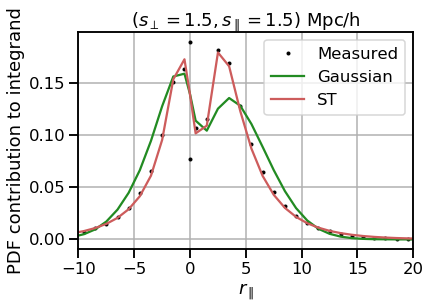

In [132]:
s = 3
mu = 0.6
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)

plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))

plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.pdf_contribution[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

#plt.plot(mean_rs.streaming.int_r_parallel, norm.pdf(mean_rs.streaming.int_r_parallel,
#                                    loc = s*mu + 0.3, scale = 3.7))
plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.pdf_contribution[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.pdf_contribution[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')
plt.xlim(-10, 20)
plt.legend(bbox_to_anchor = [1.,1.])
plt.xlabel('$r_\parallel$')
plt.ylabel('PDF contribution to integrand')
plt.grid()



In [133]:
from scipy.interpolate import interp1d
std_r = interp1d(mean_rs.per_box_list[0].measured.r,
        mean_rs.measured.std_r.mean, kind='linear', bounds_error = False,
                    fill_value = (mean_rs.measured.std_r.mean[0], mean_rs.measured.std_r.mean[-1]))
std_t = interp1d(mean_rs.per_box_list[0].measured.r,
            mean_rs.measured.std_t.mean, kind='linear', bounds_error = False,
                    fill_value = (mean_rs.measured.std_t.mean[0], mean_rs.measured.std_t.mean[-1]))


In [134]:
r_test = np.arange(0.5,99.5,1)
prefactor = r_test**2/(r_test**2 + rperp**2)

sigma_parallel = prefactor * std_r(np.sqrt(r_test**2 + rperp**2))**2 + \
     (1 - prefactor**2) * std_t(np.sqrt(r_test**2 + rperp**2))**2


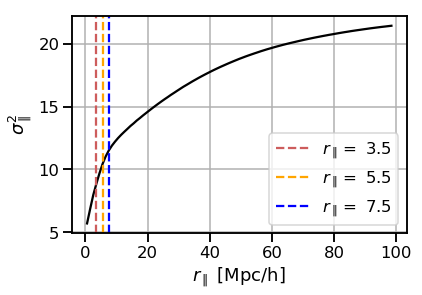

In [135]:
plt.plot(r_test, sigma_parallel, color='black')
plt.xlabel('$r_\parallel$ [Mpc/h]')
plt.ylabel('$\sigma_\parallel^2$')
check_r_parallel = [3.5,5.5,7.5]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los
    plt.axvline(x = np.abs(crp),
               color = colors[i], linestyle='dashed', label = f'$r_\parallel = $ {crp}')
plt.legend()
plt.grid(which='both')

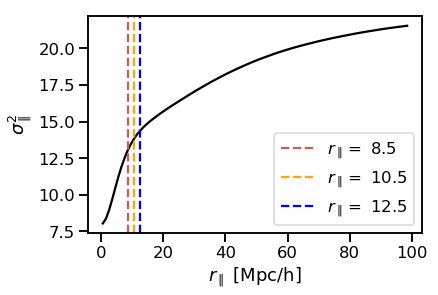

In [123]:
plt.plot(r_test, sigma_parallel, color='black')
plt.xlabel('$r_\parallel$ [Mpc/h]')
plt.ylabel('$\sigma_\parallel^2$')
check_r_parallel = [8.5,10.5,12.5]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los
    plt.axvline(x = np.abs(crp),
               color = colors[i], linestyle='dashed', label = f'$r_\parallel = $ {crp}')
plt.legend()

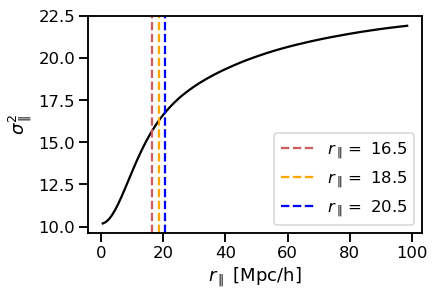

In [119]:
plt.plot(r_test, sigma_parallel, color='black')
plt.xlabel('$r_\parallel$ [Mpc/h]')
plt.ylabel('$\sigma_\parallel^2$')
check_r_parallel = [16.5,18.5,20.5]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los
    plt.axvline(x = np.abs(crp),
               color = colors[i], linestyle='dashed', label = f'$r_\parallel = $ {crp}')
plt.legend()

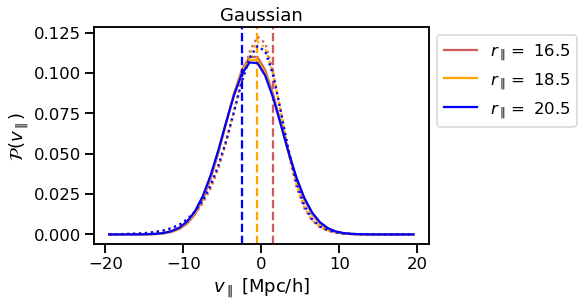

In [101]:
#check_r_parallel = [-5,-2, -0.0001, 0.0001, 2, 5,s*mu,18,24,30]
check_r_parallel = [16.5,18.5,20.5]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los

    plt.plot(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color=colors[i], linestyle='dotted')

    plt.plot(v_los,
             mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
                color = colors[i], linestyle='-', label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('Gaussian')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend(bbox_to_anchor = [1.,1.])
plt.show()

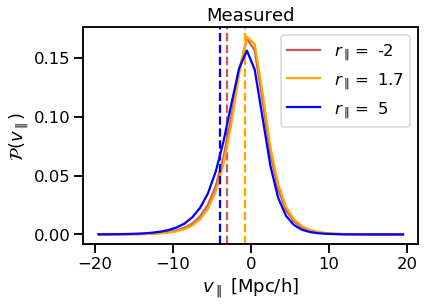

In [68]:

for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los

    plt.plot(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color=colors[i], label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('Measured')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend(bbox_to_anchor = [1.,1.])
plt.show()

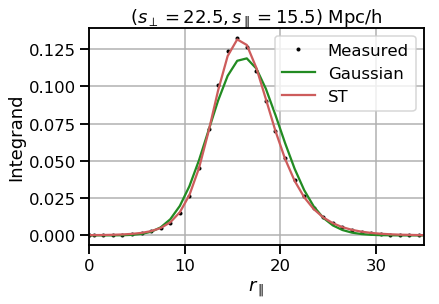

In [87]:
s = 30
mu = 0.5
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)

plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))

plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

#plt.plot(mean_rs.streaming.int_r_parallel, norm.pdf(mean_rs.streaming.int_r_parallel,
#                                    loc = s*mu + 0.3, scale = 3.7))
plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')
plt.xlim(0, 35)
plt.legend(bbox_to_anchor = [1.,1.])
plt.xlabel('$r_\parallel$')
plt.ylabel('Integrand')
plt.grid()

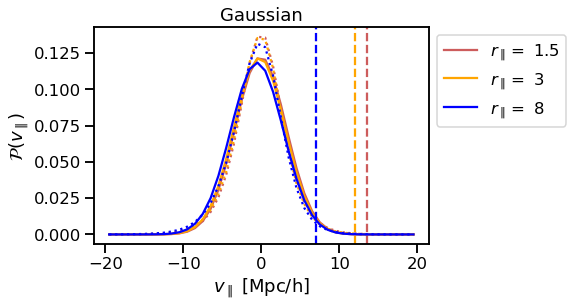

In [82]:
#check_r_parallel = [-5,-2, -0.0001, 0.0001, 2, 5,s*mu,18,24,30]
check_r_parallel = [1.5,3,8]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los
    plt.plot(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color=colors[i], linestyle='dotted')
    plt.plot(v_los,
             mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
                color = colors[i], linestyle='-', label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('Gaussian')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend(bbox_to_anchor = [1.,1.])
plt.show()

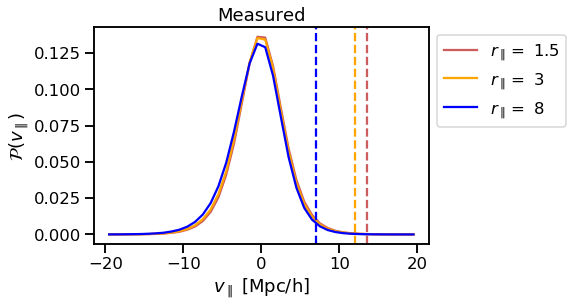

In [83]:

for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los

    plt.plot(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color=colors[i], label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('Measured')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend(bbox_to_anchor = [1.,1.])
plt.show()

In [88]:
# are they normalized?
from scipy.integrate import simps
left = mean_rs.streaming.int_r_parallel < 0.
right = mean_rs.streaming.int_r_parallel > 0.

measured_left = simps(mean_rs.streaming.pdf_contribution[rperp,rparal][left],
                      mean_rs.streaming.int_r_parallel[left])
measured_right = simps(mean_rs.streaming.pdf_contribution[rperp,rparal][right],
                      mean_rs.streaming.int_r_parallel[right])


gauss_left = simps(mean_rs.gaussian.pdf_contribution[rperp,rparal][left],
                      mean_rs.streaming.int_r_parallel[left])
gauss_right = simps(mean_rs.gaussian.pdf_contribution[rperp,rparal][right],
                      mean_rs.streaming.int_r_parallel[right])

ST_left = simps(mean_rs.skewt.pdf_contribution[rperp,rparal][left],
                      mean_rs.streaming.int_r_parallel[left])
ST_right = simps(mean_rs.skewt.pdf_contribution[rperp,rparal][right],
                      mean_rs.streaming.int_r_parallel[right])

print(f'Measured : {measured_left + measured_right:.4f}')

print(f'Gaussian : {gauss_left + gauss_right:.4f}')

print(f'ST : {ST_left + ST_right:.4f}')

Measured : 1.0221
Gaussian : 1.0218
ST : 1.0191


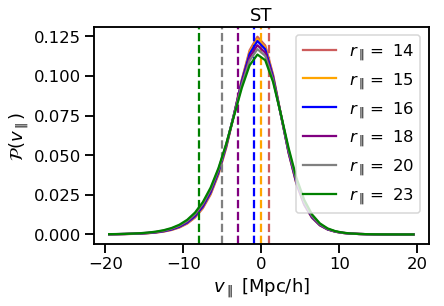

In [517]:
check_r_parallel = [14,15,16,18, 20, 23]
colors = ['indianred', 'orange','blue', 'purple', 'gray', 'green']
for i, crp in enumerate(check_r_parallel):
    v_los = mean_rs.per_box_list[0].measured.v_los

    sample_skewt = np.zeros_like(v_los)

    for k,vl in enumerate(v_los):
        sample_skewt[k] = mean_rs.skewt.jointpdf_los(rperp, (abs(crp)), vl)
    #plt.plot(v_los,
    #         mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
    #            color=colors[i], label = f'$r_\parallel = $ {crp}')

    plt.plot(v_los,
             sample_skewt,
                color = colors[i], linestyle='-', label = f'$r_\parallel = $ {crp}')

    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = colors[i], linestyle='dashed')
plt.ylabel(r'$\mathcal{P} (v_\parallel) $ ')
plt.title('ST')
plt.xlabel(r'$v_\parallel$ [Mpc/h]')
plt.legend()
plt.show()

## Integrand

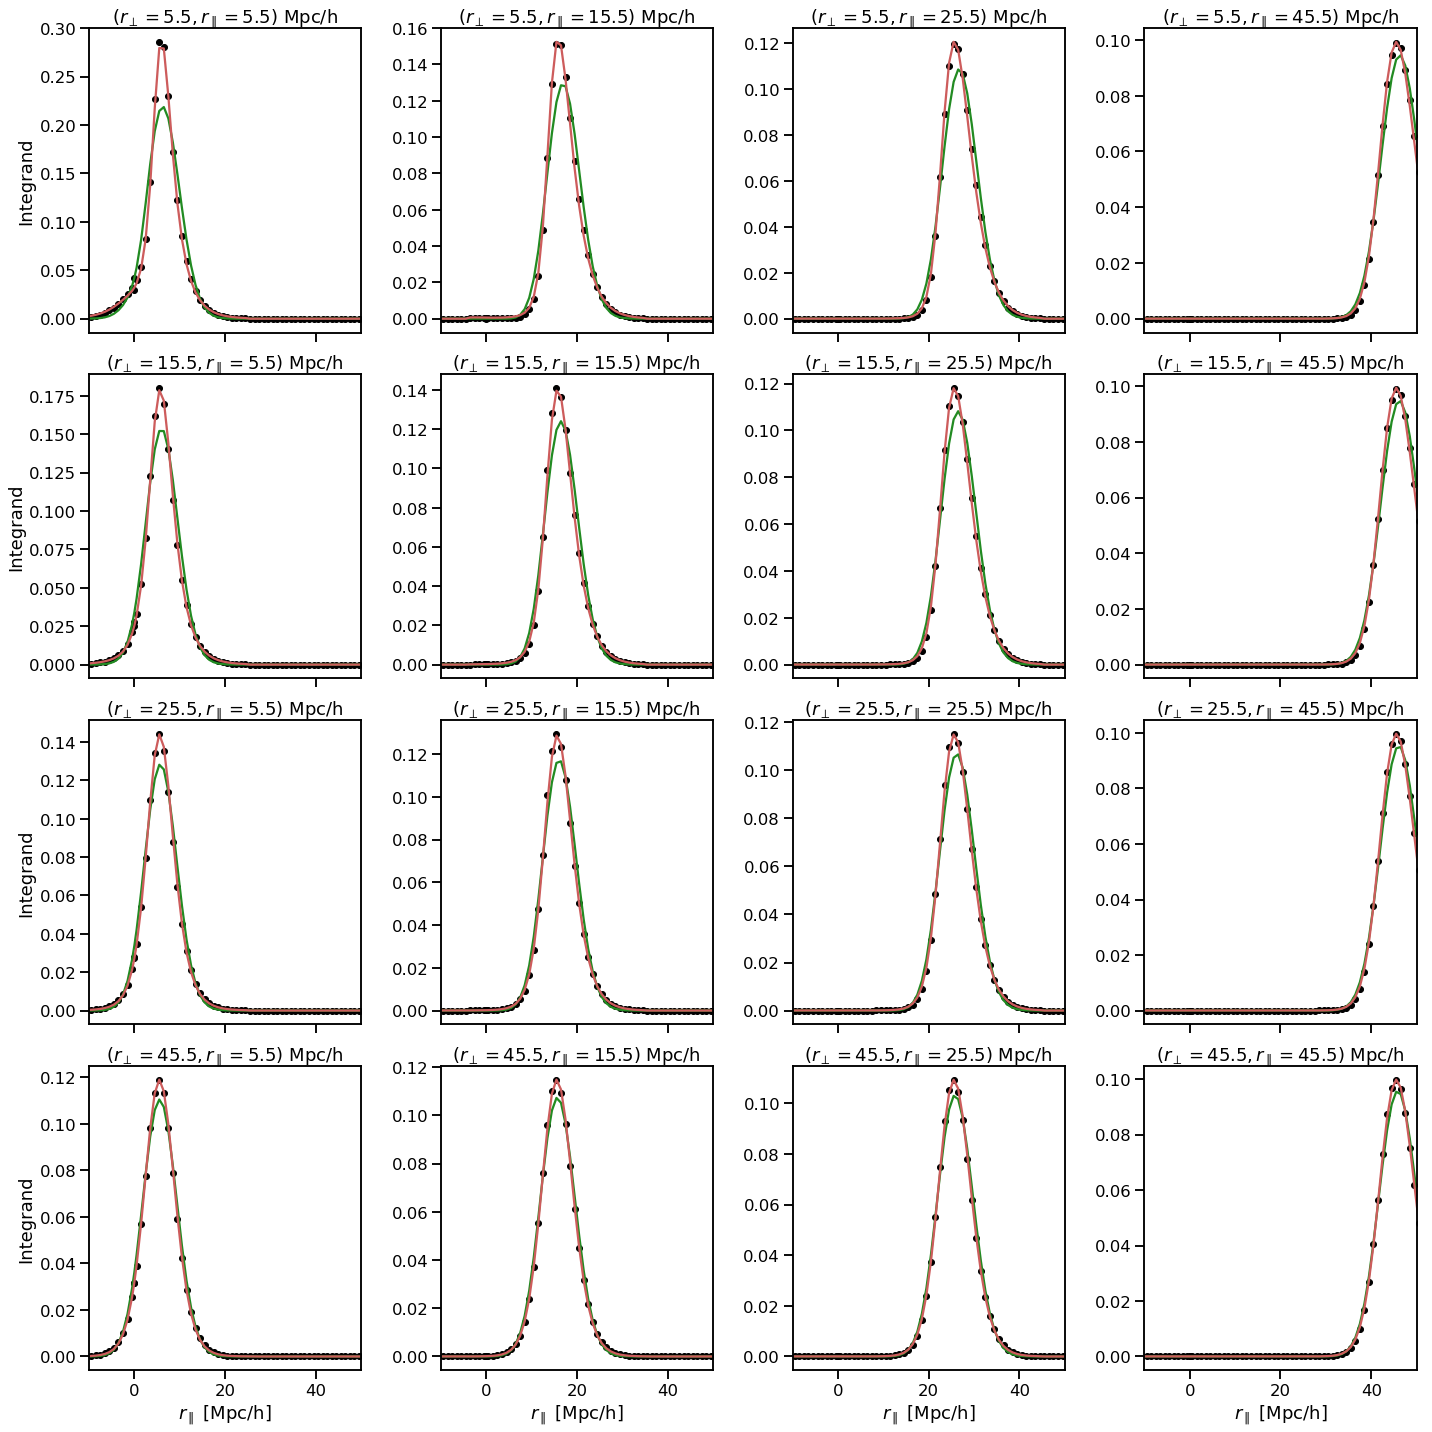

In [23]:
rlist1 = [5,15,25,45]
rlist2 = [5,15,25,45]

fig, axes = plt.subplots(nrows=len(rlist2),
                         ncols=len(rlist1),sharex=True,
                         sharey=False, figsize=(20,20))

for i, rperp in enumerate(rlist2):
    for j, rparal in enumerate(rlist1):
        axes[i,j].set_title(r'($ r_\perp = %.1f'
                       ', r_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                                       rs[0].measured.r_parallel[rparal]))
        axes[i,j].plot(mean_rs.streaming.int_r_parallel,
                mean_rs.streaming.integrand[rperp,rparal], 
                linestyle='', marker='o',
                markersize=6, color='k', label='Measured')

        axes[i,j].plot(mean_rs.gaussian.int_r_parallel,
                mean_rs.gaussian.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.gaussian.color, label='Gaussian')
        
        axes[i,j].plot(mean_rs.skewt.int_r_parallel,
                mean_rs.skewt.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.skewt.color, label='ST')
        axes[i,j].set_xlim(-10, 50)
        if j == 0:
            axes[i,j].set_ylabel(r'Integrand')
            #labels = list(axes[i,j].get_yticklabels())
            #labels[-1] = ''
            #axes[i,j].set_yticklabels(labels)
            
        if i == len(rlist2)-1:
            axes[i,j].set_xlabel(r'$r_\parallel$ [Mpc/h]')
            
        #if i==len(rlist2)-1 and j==0:
        #    axes[i,j].legend()
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()


## Check normalization

In [214]:
sperp = 33
spar = 22

In [215]:
def skewt(vlos):
    return [mean_rs.skewt.jointpdf_los(sperp, spar,v) for v in vlos]

def gaussian(vlos):
    return mean_rs.gaussian.jointpdf_los(sperp, spar, vlos)

In [216]:
sk = [mean_rs.skewt.jointpdf_los(sperp, spar,v) for v in vlos]

In [217]:
gauss = mean_rs.gaussian.jointpdf_los(sperp, spar, vlos)

In [220]:
print(f'Gaussian : {simps(gauss, vlos):.5f}')
print(f'ST : {simps(sk, vlos):.5f}')
print(f'Gaussian Quad : {quadrature(gaussian, -20.,20.)[0]:.5f}')
print(f'ST Quad : {quadrature(skewt, -80.,80.)[0]:.5f}')


Gaussian : 1.00000
ST : 0.99980
Gaussian Quad : 1.00000
ST Quad : 0.99813


/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/integrate/quadrature.py:233: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.096436e-03
  AccuracyWarning)


In [223]:
print(f'ST Quad : {quadrature(skewt, -200.,200.)[0]:.5f}')


ST Quad : 0.59950


/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/integrate/quadrature.py:233: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.544347e-01
  AccuracyWarning)


## Direct comparison Simpson vs Quadrature

In [11]:
from scipy.integrate import quadrature, simps
from scipy.interpolate import interp1d

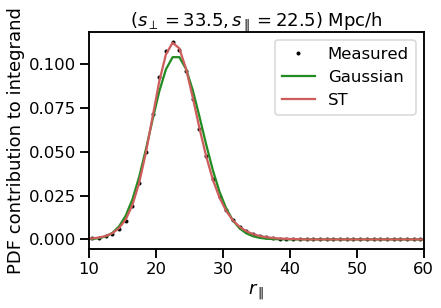

Text(0, 0.5, 'Integrand')

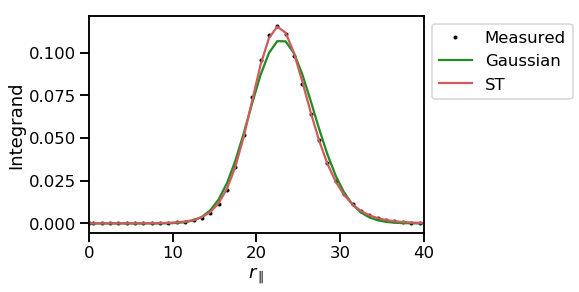

In [273]:
s = 45
mu = 0.5
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)

plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))

plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.pdf_contribution[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

#plt.plot(mean_rs.streaming.int_r_parallel, norm.pdf(mean_rs.streaming.int_r_parallel,
#                                    loc = s*mu + 0.3, scale = 3.7))
plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.pdf_contribution[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.pdf_contribution[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')
plt.xlim(10,60)
plt.legend(bbox_to_anchor = [1.,1.])
plt.xlabel('$r_\parallel$')
plt.ylabel('PDF contribution to integrand')
plt.show()

plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

#plt.plot(mean_rs.streaming.int_r_parallel, norm.pdf(mean_rs.streaming.int_r_parallel,
#                                    loc = s*mu + 0.3, scale = 3.7))
plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')
plt.xlim(0,40)
plt.legend(bbox_to_anchor = [1.,1.])
plt.xlabel('$r_\parallel$')
plt.ylabel('Integrand')


In [274]:
mean_tpcf = mean_rs.mean_tpcf_dict 

interp_mean_tpcf = interp1d(mean_tpcf['r'],mean_tpcf['tpcf'], kind='linear',
                           fill_value = (0.,0.))

In [275]:
def define_integrand(y_value, function_los_pdf, xi=True):

    r = np.sqrt(rperp**2 + y_value**2)

    truncate = 20.
    
    vlos = (rparal - y_value) * np.sign(y_value)
    
    if xi:
        p = interp_mean_tpcf(r)*function_los_pdf(rperp,
                             abs(y_value), vlos)
    else:
        
        p = function_los_pdf(rperp,
                             abs(y_value), vlos)
    return p


In [276]:
def define_integrand_discrete(y, los_pdf, xi=True):
    integrand = []
    for y_value in y:

        r = np.sqrt(rperp**2 + y_value**2)

        y_bin = np.digitize(np.abs(y_value),
        mean_rs.per_box_list[0].measured.r_parallel - 0.5) - 1


        vlos = (rparal - y_value) * np.sign(y_value)
        
        s_perp_bin = int(rperp)
        
        selected_pairwise_pdf = los_pdf[s_perp_bin,y_bin, :]

        interp_pairwise_pdf = interp1d(mean_rs.per_box_list[0].measured.v_los,
                                       selected_pairwise_pdf, kind='cubic',
                                       fill_value = (0.,0.))
        if ( (vlos > np.min(mean_rs.per_box_list[0].measured.v_los)) and (vlos < np.max(mean_rs.per_box_list[0].measured.v_los) ) ):
            p = interp_pairwise_pdf(vlos)
            
        else:
            p = 0.

        if xi:
            p *= interp_mean_tpcf(r)

            
        integrand.append(p)
    return integrand


In [277]:

quadrature_gauss_left = quadrature(define_integrand, 
                              -70., 0.,
                              args = (mean_rs.gaussian.jointpdf_los))


quadrature_gauss_right = quadrature(define_integrand, 
                              0., 70.,
                              args = (mean_rs.gaussian.jointpdf_los))



quad_gauss_xi = quadrature_gauss_left[0] + quadrature_gauss_right[0]
error_gauss_xi = quadrature_gauss_right[1]

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/integrate/quadrature.py:233: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.808379e-06
  AccuracyWarning)


In [278]:

quadrature_gauss_left = quadrature(define_integrand, 
                              -70., 0.,
                              args = (mean_rs.gaussian.jointpdf_los, False))


quadrature_gauss_right = quadrature(define_integrand, 
                              0., 70.,
                              args = (mean_rs.gaussian.jointpdf_los,False))



quad_gauss_noxi = quadrature_gauss_left[0] + quadrature_gauss_right[0]
error_gauss_noxi = quadrature_gauss_right[1]

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/integrate/quadrature.py:233: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.485921e-06
  AccuracyWarning)


In [279]:

quadrature_st_left = quadrature(define_integrand, 
                              -70., 0.,
                              args = (mean_rs.skewt.jointpdf_los))


quadrature_st_right = quadrature(define_integrand, 
                              0., 70.,
                              args = (mean_rs.skewt.jointpdf_los))



quad_st_xi = quadrature_st_left[0] + quadrature_st_right[0]
error_st_xi = quadrature_st_right[1]

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/integrate/quadrature.py:233: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.725496e-06
  AccuracyWarning)


In [280]:

quadrature_st_left = quadrature(define_integrand, 
                              -70., 0.,
                              args = (mean_rs.skewt.jointpdf_los, False))


quadrature_st_right = quadrature(define_integrand, 
                              0., 70.,
                              args = (mean_rs.skewt.jointpdf_los, False))



quad_st_noxi = quadrature_st_left[0] + quadrature_st_right[0]
error_st_noxi = quadrature_st_right[1]

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/integrate/quadrature.py:233: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.129938e-06
  AccuracyWarning)


In [281]:
# are they normalized?
left = mean_rs.streaming.int_r_parallel < 0.
right = mean_rs.streaming.int_r_parallel > 0.

measured_left = simps(mean_rs.streaming.pdf_contribution[rperp,rparal][left],
                      mean_rs.streaming.int_r_parallel[left])
measured_right = simps(mean_rs.streaming.pdf_contribution[rperp,rparal][right],
                      mean_rs.streaming.int_r_parallel[right])


gauss_left = simps(mean_rs.gaussian.pdf_contribution[rperp,rparal][left],
                      mean_rs.streaming.int_r_parallel[left])
gauss_right = simps(mean_rs.gaussian.pdf_contribution[rperp,rparal][right],
                      mean_rs.streaming.int_r_parallel[right])

ST_left = simps(mean_rs.skewt.pdf_contribution[rperp,rparal][left],
                      mean_rs.streaming.int_r_parallel[left])
ST_right = simps(mean_rs.skewt.pdf_contribution[rperp,rparal][right],
                      mean_rs.streaming.int_r_parallel[right])

In [282]:

print('No xi')
print(f'Measured : {measured_left + measured_right:.4f}')

print(f'Gaussian : {gauss_left + gauss_right:.4f}')

print(f'ST : {ST_left + ST_right:.4f}')

print(f'Gaussian Quad : {quad_gauss_noxi:.4f}, (error = {error_gauss_noxi:.4E})')

print(f'ST Quad : {quad_st_noxi :.4f}, (error = {error_st_noxi:.4E})')



No xi
Measured : 1.0097
Gaussian : 1.0090
ST : 1.0072
Gaussian Quad : 1.0096, (error = 1.4859E-06)
ST Quad : 1.0081, (error = 2.1299E-06)


In [283]:
streaming_integrand_xi = define_integrand_discrete(mean_rs.streaming.int_r_parallel,
                                    mean_rs.measured.jointpdf_los.mean, xi=True)

In [284]:
# are they normalized?
left = mean_rs.streaming.int_r_parallel < 0.
right = mean_rs.streaming.int_r_parallel > 0.

streaming_integrand = define_integrand(mean_rs.streaming.int_r_parallel, mean_rs.gaussian.jointpdf_los, xi = True)
measured_left = simps(streaming_integrand[left],
                      mean_rs.streaming.int_r_parallel[left])
measured_right = simps(streaming_integrand[right],
                      mean_rs.streaming.int_r_parallel[right])

gauss_integrand = define_integrand(mean_rs.streaming.int_r_parallel, mean_rs.gaussian.jointpdf_los, xi = True)
gauss_left = simps(gauss_integrand[left],
                      mean_rs.streaming.int_r_parallel[left])
gauss_right = simps(gauss_integrand[right],
                      mean_rs.streaming.int_r_parallel[right])

st_integrand = define_integrand(mean_rs.skewt.int_r_parallel, mean_rs.skewt.jointpdf_los, xi = True)

ST_left = simps(st_integrand[left],
                      mean_rs.streaming.int_r_parallel[left])
ST_right = simps(st_integrand[right],
                      mean_rs.streaming.int_r_parallel[right])

(7, 35)

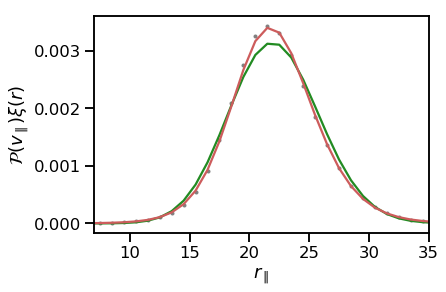

In [287]:
plt.plot(mean_rs.streaming.int_r_parallel,streaming_integrand_xi, 
        color = mean_rs.streaming.color, linestyle = '',
        marker = 'o', markersize=3)
plt.plot(mean_rs.streaming.int_r_parallel,gauss_integrand,
        color = mean_rs.gaussian.color)
plt.plot(mean_rs.streaming.int_r_parallel,st_integrand,
                color = mean_rs.skewt.color)
plt.xlabel('$r_\parallel$')
plt.ylabel(r'$ \mathcal{P}(v_\parallel) \xi (r)$')

plt.xlim(7,35)

In [271]:
print('Xi')
print(f'Measured : {measured_left + measured_right:.4f}')

print(f'Gaussian : {gauss_left + gauss_right:.4f}')

print(f'ST : {ST_left + ST_right:.4f}')

print(f'Gaussian Quad : {quad_gauss_xi:.4f}, (error = {error_gauss_xi:.4E})')

print(f'ST Quad : {quad_st_xi :.4f}, (error = {error_st_xi:.4E})')

Xi
Measured : 0.0578
Gaussian : 0.0578
ST : 0.0578
Gaussian Quad : 0.0578, (error = 1.8671E-06)
ST Quad : 0.0578, (error = 4.3406E-06)
